

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altereos comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>









<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Estamos no caminho certo com essa versão, mas retocar os pontos indicados abaixo nos fará chegar em um resultado ainda mais incrível.
    
Conte comigo para ajudá-lo (a) em qualquer questão que possa vir a ter! Lembre-se de usar as caixas azuis para se comunicar comigo.
    
Até breve.
</div>


<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

Perfeito, Taina! O estudo dos eventos ao longo do tempo, do funil de conversão e das características e volumetrias dos grupos foi conduzido adequadamente! Estamos prontos para o teste A/B.
</div>





<div class="alert alert-danger">
<strong>Comentário do revisor v3</strong>

Avançamos bastante com os ajustes, mas ainda temos alguns pontos pendentes. Procure por 'v3' para encontrá-los com mais facilidade.

Estamos quase lá! Vamos juntos até o fim.
</div>



O objetivo principal do projeto é avaliar como um novo sistema de recomendação impacta no funil de compras da loja online. 

Para isso, iremos:

1) Dividir os usuarios em dois grupos, sendo grupo A (controle) e B (teste), e comparar o comportamento dos usuários no funil de acordo com os 3 parâmetros abaixo:

-Compras realizadas (purchase)

-Visualizações de página de produto (product_page)

-Adições ao carrinho (product_cart)

2) Determinar a conversão nas etapas do funil (de product_page para product_cart e para purchase) no prazo de 14 dias após o cadastro.

3) Validar se houve um aumento de pelo menos 10% em cada etapa do funil no grupo B comparado ao grupo A, conforme esperado.


🚩 OBSERVAÇÃO:

Para tratar os dados, inicialmente vamos garantir que as colunas event_dt, start_dt, finish_dt, first_date são tipo datetime.

As demais colunas (user_id, event_name, region, device, ab_test, group, etc.) devem ser strings/categorias e inteiros.

Além disso, devemos tratar os valores ausentes/duplicados. Para esse tipo de análise, não é interessante que os dados tenham datas nulas e/ou usuários duplicados.

Como realizaremos um teste A/B, é importante verificar também se nenhum usuário esta em mais de um grupo.


In [1]:
#Importando as bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

In [2]:
#Leitura dos dados

df_marketing_events = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')
df_new_users = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
df_events = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
df_participants = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')


In [3]:
df_marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [4]:
#Verificando Valores ausentes no df_marketing_events :
df_marketing_events.isnull().sum()

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

In [5]:
df_marketing_events.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


Após verificar as informações sobre o calendário de eventos de marketing para 2020, precisamos de:

-Converter as datas para o tipo datetime

-Verificiar valores unicos na coluna regions

-Calcular a duração de cada evento (data final - data inicial)


In [6]:
#Convertendo datas para o tipo datetime:

df_marketing_events['start_dt'] = pd.to_datetime(df_marketing_events['start_dt'])
df_marketing_events['finish_dt'] = pd.to_datetime(df_marketing_events['finish_dt'])

In [7]:
#Verificando valores unicos em regions:

df_marketing_events['regions'].unique()

array(['EU, N.America', 'EU, CIS, APAC, N.America', 'N.America', 'APAC',
       'EU, CIS, APAC', 'CIS'], dtype=object)

In [8]:
#Calculando a duração dos eventos:

df_marketing_events['duration_days'] = (df_marketing_events['finish_dt'] - df_marketing_events['start_dt']).dt.days

In [9]:
#Separando as regiões em linhas diferentes:

df_marketing_events['regions'] = df_marketing_events['regions'].str.split(', ')

df_marketing_events = df_marketing_events.explode('regions').reset_index(drop=True)

In [10]:
df_marketing_events = df_marketing_events.rename(columns={"regions": "region"})

In [11]:
df_marketing_events.head()

,name,region,start_dt,finish_dt,duration_days
0,Christmas&New Year Promo,EU,2020-12-25,2021-01-03,9
1,Christmas&New Year Promo,N.America,2020-12-25,2021-01-03,9
2,St. Valentine's Day Giveaway,EU,2020-02-14,2020-02-16,2
3,St. Valentine's Day Giveaway,CIS,2020-02-14,2020-02-16,2
4,St. Valentine's Day Giveaway,APAC,2020-02-14,2020-02-16,2


In [12]:
df_new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [13]:
#Verificando Valores ausentes no df_new_users :

df_new_users.isnull().sum()

user_id       0
first_date    0
region        0
device        0
dtype: int64

In [14]:
#Verificando Valores duplicados no df_new_users :

df_new_users['user_id'].duplicated().sum()

0

In [15]:
df_new_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [16]:
#Convertendo first_date de object para datetime

df_new_users['first_date'] = pd.to_datetime(df_new_users['first_date'])

In [17]:
df_new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


In [18]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [19]:
#Verificando Valores ausentes no df_events :

df_events.isnull().sum()

user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64

In [20]:
df_events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [21]:
# Transformando em datetime a coluna event_dt:

df_events['event_dt'] = pd.to_datetime(df_events['event_dt'])


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.

Sempre importante para garantir uma análise robusta!
</div>



In [22]:
df_participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In [23]:
df_participants.user_id.value_counts()

5B57E88DFE82FAD6    2
FA8706D1E274805E    2
E02247CEF572ACCA    2
E7CC63BF20618321    2
891458DEF142C0A3    2
                   ..
F3F863075CD18AD4    1
8979D2EA0F10098F    1
00807760AE4F0504    1
B59C75441B3C12A4    1
C33BE2AF4F19085A    1
Name: user_id, Length: 13638, dtype: int64

In [24]:
df_participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [25]:
df_participants[df_participants.duplicated('user_id', keep=False)].groupby('user_id')['group'].nunique().value_counts()

1    446
2    441
Name: group, dtype: int64

O resultado acima mostra que 446 usuários aparecem em exatamente 1 grupo (ou seja, grupo A ou grupo B, mesmo que duplicados no mesmo grupo) e 441 usuários aparecem em 2 grupos diferentes — isso é um problema grave para um teste A/B, pois esses usuários foram atribuídos aos dois grupos, o que viola o princípio de randomização.

Portanto, é necessário manter os usuários que aparecem apenas em um grupo e exclui os outros do teste.

In [26]:
#Deixando usuarios em apenas 1 grupo:

# Identifica os usuários válidos (que aparecem em apenas um grupo)
user_group_counts = df_participants.groupby('user_id')['group'].nunique()
valid_users = user_group_counts[user_group_counts == 1].index

# Filtra o dataframe original
df_participants_clean = df_participants[df_participants['user_id'].isin(valid_users)]


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Beleza, o filtro dos usuários foi realizado adequadamente. Só é importante ficar claro que o volume de usuários analisado por você está bem menor pois você focou nos ids duplicados (que de fato são os que podem gerar problemas). O volume de usuários total é obviamente bem maior que isso.
</div>



In [27]:
df_participants_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13643 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13643 non-null  object
 1   group    13643 non-null  object
 2   ab_test  13643 non-null  object
dtypes: object(3)
memory usage: 426.3+ KB


In [28]:
# Unindo os dfs df_new_users e df_purchases através da coluna user_id:

df_merged_1 = pd.merge(df_events, df_new_users, on='user_id', how='left')

In [29]:
df_merged_1.head()

,user_id,event_dt,event_name,details,first_date,region,device
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07,N.America,iPhone
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,2020-12-07,EU,iPhone
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,2020-12-07,N.America,iPhone
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,EU,iPhone
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,2020-12-07,EU,Android


In [30]:
# Unindo os dfs df_merged_1 e df_participants_clean através da coluna user_id:

df_merged_2 = pd.merge(df_merged_1, df_participants_clean, on='user_id', how='left')

In [31]:
df_merged_2.head()

,user_id,event_dt,event_name,details,first_date,region,device,group,ab_test
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07,N.America,iPhone,NaN,NaN
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,2020-12-07,EU,iPhone,NaN,NaN
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,2020-12-07,N.America,iPhone,NaN,NaN
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,EU,iPhone,B,interface_eu_test
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,2020-12-07,EU,Android,NaN,NaN


In [32]:
df_merged_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426785 entries, 0 to 426784
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     426785 non-null  object        
 1   event_dt    426785 non-null  datetime64[ns]
 2   event_name  426785 non-null  object        
 3   details     60783 non-null   float64       
 4   first_date  426785 non-null  datetime64[ns]
 5   region      426785 non-null  object        
 6   device      426785 non-null  object        
 7   group       97456 non-null   object        
 8   ab_test     97456 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 32.6+ MB


In [33]:
# Unindo os dfs df_merged_2 e df_marketing_events através da coluna region:

df_merged_final = pd.merge(df_merged_2, df_marketing_events, on='region', how='left')

In [34]:
df_merged_final.head()

,user_id,event_dt,event_name,details,first_date,region,device,group,ab_test,name,start_dt,finish_dt,duration_days
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07,N.America,iPhone,NaN,NaN,Christmas&New Year Promo,2020-12-25,2021-01-03,9
1,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07,N.America,iPhone,NaN,NaN,St. Valentine's Day Giveaway,2020-02-14,2020-02-16,2
2,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07,N.America,iPhone,NaN,NaN,St. Patric's Day Promo,2020-03-17,2020-03-19,2
3,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07,N.America,iPhone,NaN,NaN,Easter Promo,2020-04-12,2020-04-19,7
4,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07,N.America,iPhone,NaN,NaN,4th of July Promo,2020-07-04,2020-07-11,7


In [35]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2962452 entries, 0 to 2962451
Data columns (total 13 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        object        
 1   event_dt       datetime64[ns]
 2   event_name     object        
 3   details        float64       
 4   first_date     datetime64[ns]
 5   region         object        
 6   device         object        
 7   group          object        
 8   ab_test        object        
 9   name           object        
 10  start_dt       datetime64[ns]
 11  finish_dt      datetime64[ns]
 12  duration_days  int64         
dtypes: datetime64[ns](4), float64(1), int64(1), object(7)
memory usage: 316.4+ MB


In [36]:
# Etapas do funil:

etapas = ['product_page', 'product_cart', 'purchase']

# Filtrar o DataFrame para as etapas:

df_funil = df_merged_final[df_merged_final['event_name'].isin(etapas)]

# Número de usuários únicos em cada etapa:

usuarios_por_etapa = df_funil.groupby('event_name')['user_id'].nunique().reindex(etapas)

# Calcular taxas de conversão entre as etapas:

conversion_to_cart = usuarios_por_etapa['product_cart'] / usuarios_por_etapa['product_page']
conversion_to_purchase = usuarios_por_etapa['purchase'] / usuarios_por_etapa['product_cart']
total_conversion = usuarios_por_etapa['purchase'] / usuarios_por_etapa['product_page']

# Exibir resultados:

print("Usuários únicos por etapa:")
print(usuarios_por_etapa)
print("\nTaxa de conversão de product_page → product_cart:", round(conversion_to_cart, 3))
print("Taxa de conversão de product_cart → purchase:", round(conversion_to_purchase, 3))
print("Conversão total de product_page → purchase:", round(total_conversion, 3))

Usuários únicos por etapa:
event_name
product_page    38929
product_cart    19284
purchase        19568
Name: user_id, dtype: int64

Taxa de conversão de product_page → product_cart: 0.495
Taxa de conversão de product_cart → purchase: 1.015
Conversão total de product_page → purchase: 0.503


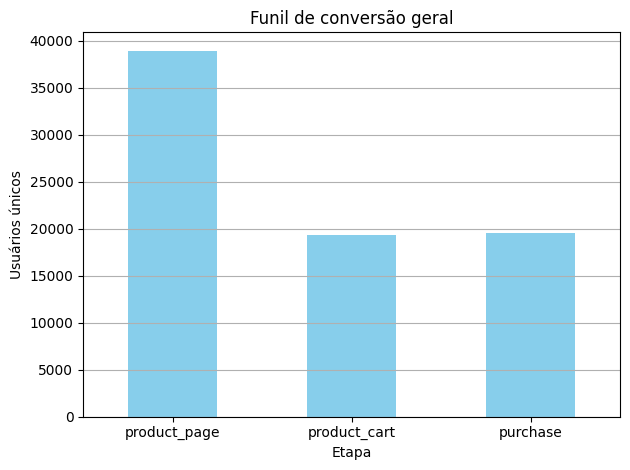

In [37]:
# Plotar o funil:

usuarios_por_etapa.plot(kind='bar', color='skyblue')
plt.title('Funil de conversão geral')
plt.xlabel('Etapa')
plt.ylabel('Usuários únicos')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

A conversão de 101,5% entre product_cart e purchase indica que há mais usuários comprando do que adicionando ao carrinho. 
Isso pode ocorrer por alguns motivos, alguns deles são:
Usuários que compram sem passar pela etapa de adicionar ao carrinho, Recompra de um item já salvo.
Eventos de product_cart não sendo registrados corretamente ou eventos de purchase sendo duplicados ou mais amplamente capturados.

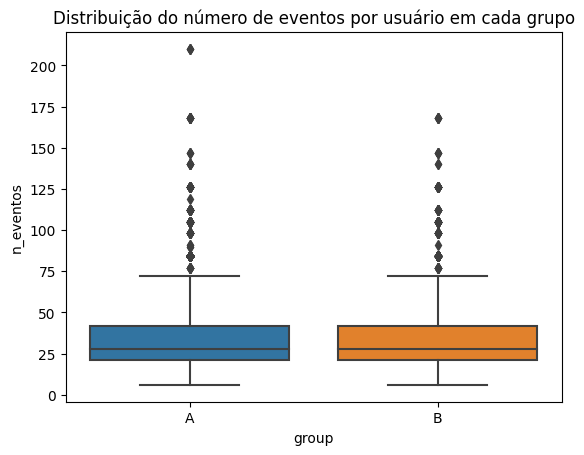

In [38]:
# Contar o número de eventos por usuário em cada grupo:

eventos_por_usuario = df_merged_final[df_merged_final['event_name'].isin(etapas)].groupby(['group', 'user_id'])['event_name'].count().reset_index(name='n_eventos')

# Visualizar a distribuição do número de eventos por usuário:

sns.boxplot(data=eventos_por_usuario, x='group', y='n_eventos')
plt.title('Distribuição do número de eventos por usuário em cada grupo')
plt.show()

In [39]:
# Verificar o número de usuários únicos por grupo:

usuarios_por_grupo = df_merged_final[['user_id', 'group']].drop_duplicates().groupby('group').size()
print(usuarios_por_grupo)

# Verificar usuários que estão em mais de um grupo (não deveria ocorrer em um teste A/B):

usuarios_por_grupo_multiple = df_merged_final.groupby('user_id')['group'].nunique()
usuarios_multiplos_grupos = usuarios_por_grupo_multiple[usuarios_por_grupo_multiple > 1]
print(f"Usuários em mais de um grupo: {len(usuarios_multiplos_grupos)}")

group
A    7433
B    5764
dtype: int64
Usuários em mais de um grupo: 0


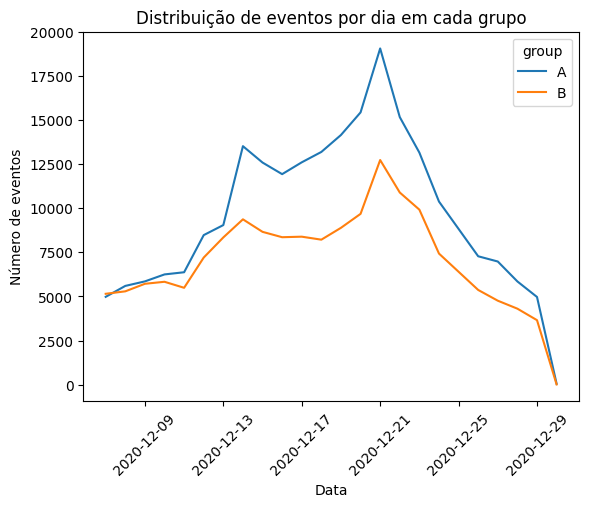

In [40]:
#Distribuição do numero de eventos por dia:

# Extrair a data dos eventos
df_merged_final['event_date'] = pd.to_datetime(df_merged_final['event_dt']).dt.date

# Agrupar por data e grupo para contar o número de eventos
eventos_por_dia = df_merged_final[df_merged_final['event_name'].isin(etapas)].groupby(['event_date', 'group'])['user_id'].count().reset_index(name='n_eventos')

# Visualizar os eventos ao longo dos dias
sns.lineplot(data=eventos_por_dia, x='event_date', y='n_eventos', hue='group')
plt.title('Distribuição de eventos por dia em cada grupo')
plt.ylabel('Número de eventos')
plt.xlabel('Data')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Perfeito, Taina! O estudo dos eventos ao longo do tempo, do funil de conversão e das características e volumetrias dos grupos foi conduzido adequadamente! Estamos prontos para o teste A/B.
</div>


In [41]:
# Conversão por grupo
conversion_by_group = df_merged_final[df_merged_final['event_name'] == 'purchase'].groupby('group')['user_id'].nunique()
users_by_group = df_merged_final[df_merged_final['event_name'] == 'product_page'].groupby('group')['user_id'].nunique()

conversion_rate = (conversion_by_group / users_by_group).reset_index()
conversion_rate.columns = ['group', 'conversion_rate']
print(conversion_rate)

  group  conversion_rate
0     A         0.517521
1     B         0.506326


📌Grupos de Teste:
    
Grupo A: controle (experiência atual)

Grupo B: teste (nova experiência)

📌 Hipóteses para o teste A/B

Hipótese Nula (H₀):
A taxa de conversão do grupo B é igual à do grupo A.

Hipótese Alternativa (H₁):
A taxa de conversão do grupo B é diferente da do grupo A.

📌 Interpretação do resultado:

Se p-valor < 0.05 → Rejeitamos H₀.

Se p-valor ≥ 0.05 → Não rejeitamos H₀.

In [42]:
#Calculando o número de compras e de visitantes por grupo:

successes = conversion_by_group.values  
n_obs = users_by_group.values  

# Teste z
z_stat, p_value = proportions_ztest(successes, n_obs)

print(f'Estatística z: {z_stat:.3f}')
print(f'Valor-p: {p_value:.3f}')
if p_value < 0.05:
    print('Diferença estatisticamente significativa entre os grupos.')
else:
    print('Não há diferença estatisticamente significativa.')

Estatística z: 1.031
Valor-p: 0.302
Não há diferença estatisticamente significativa.


📌Conclusão do Teste AB para Conversão:


O teste A/B realizado para comparar a taxa de conversão entre os grupos A (controle) e B (teste) não identificou diferença estatisticamente significativa entre as versões testadas. A estatística Z foi de 1.031, com um valor-p de 0.302, indicando que a variação observada pode ter ocorrido por acaso. Dessa forma, não há evidências suficientes para afirmar que a nova experiência (grupo B) impacta positivamente a conversão de usuários em comparação à versão atual. Com base nesse resultado, recomenda-se manter a versão existente e explorar outras hipóteses ou segmentos de usuários onde melhorias mais significativas possam ser observadas.


<div class="alert alert-danger">
<strong>Comentário do revisor v3</strong>

O teste foi implementado e analisado corretamente, mas seria importante formular as hipóteses sendo testadas para garantimos a clareza do teste que iremos executar.
</div>




<div class="alert alert-danger">
<strong>Comentário do revisor v3</strong>

Lembre-se de formular uma conclusão detalhada com tudo que descobriu ao longo do projeto.
</div>



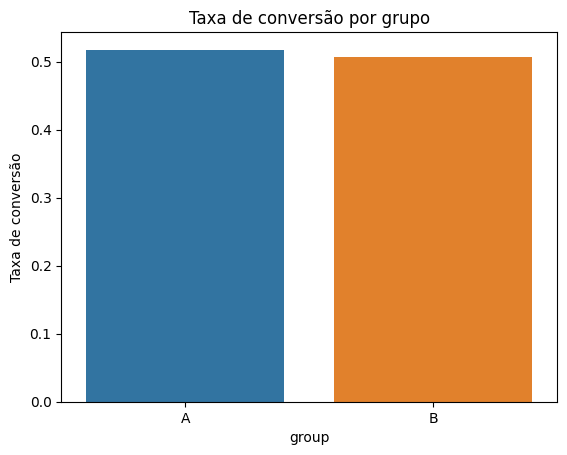

In [43]:
#Taxa de conversão por grupo:

sns.barplot(data=conversion_rate, x='group', y='conversion_rate')
plt.title('Taxa de conversão por grupo')
plt.ylabel('Taxa de conversão')
plt.show()

In [44]:
#Funil por grupo:
funil_por_grupo = df_funil.groupby(['group', 'event_name'])['user_id'].nunique().unstack().fillna(0)
funil_por_grupo['cart_rate'] = funil_por_grupo['product_cart'] / funil_por_grupo['product_page']
funil_por_grupo['purchase_rate'] = funil_por_grupo['purchase'] / funil_por_grupo['product_cart']
funil_por_grupo['total_conversion'] = funil_por_grupo['purchase'] / funil_por_grupo['product_page']
print(funil_por_grupo)

event_name  product_cart  product_page  purchase  cart_rate  purchase_rate  \
group                                                                        
A                   2357          4937      2555   0.477415       1.084005   
B                   1911          3715      1881   0.514401       0.984301   

event_name  total_conversion  
group                         
A                   0.517521  
B                   0.506326  


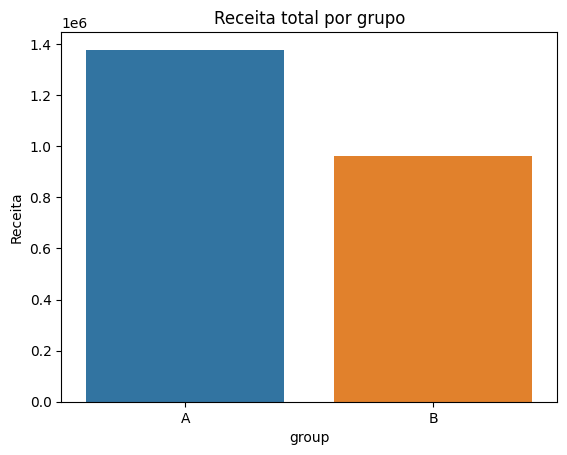

In [45]:
#Análise da receita total por grupo:

# Filtrar apenas os eventos de compra com valor de receita
df_receita = df_merged_final[(df_merged_final['event_name'] == 'purchase') & (df_merged_final['details'].notna())]

# Receita total por grupo
receita_por_grupo = df_receita.groupby('group')['details'].sum().reset_index()

# Visualizar
sns.barplot(data=receita_por_grupo, x='group', y='details')
plt.title('Receita total por grupo')
plt.ylabel('Receita')
plt.show()

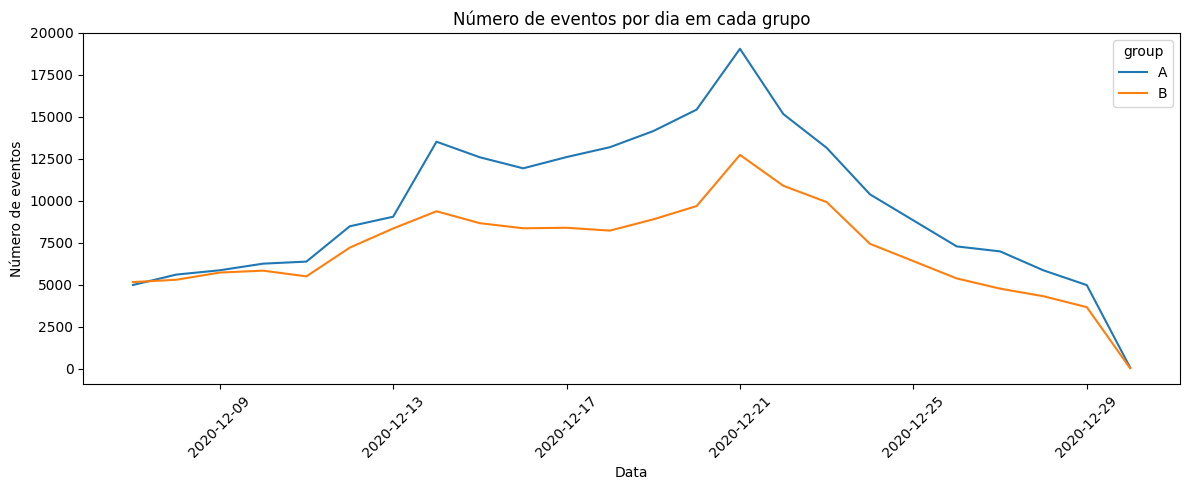

In [46]:
#Analisando eventos por dia em cada grupo:

# Filtrar apenas os eventos do funil
df_eventos_funil = df_merged_final[df_merged_final['event_name'].isin(etapas)]

# Contar número de eventos por dia e por grupo
eventos_por_dia = (
    df_eventos_funil
    .groupby(['event_date', 'group'])['user_id']
    .count()
    .reset_index(name='n_eventos')
)

# Visualizar linha do tempo de eventos
plt.figure(figsize=(12, 5))
sns.lineplot(data=eventos_por_dia, x='event_date', y='n_eventos', hue='group')
plt.title('Número de eventos por dia em cada grupo')
plt.ylabel('Número de eventos')
plt.xlabel('Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

  group  ticket_medio
0     A     23.848542
1     B     23.374942


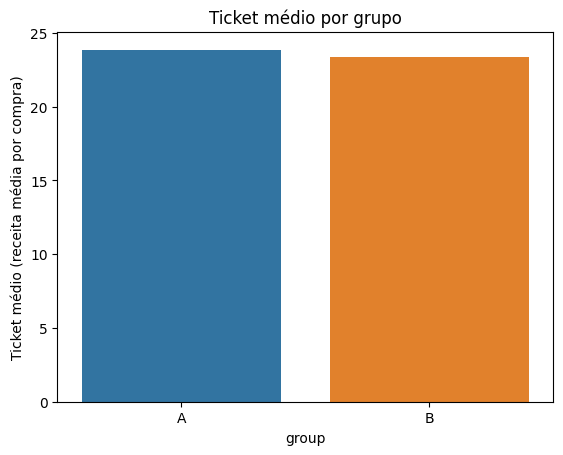

In [48]:
#Ticket médio por grupo:

# Filtrar eventos de compra com receita válida
df_compras = df_merged_final[(df_merged_final['event_name'] == 'purchase') & (df_merged_final['details'].notna())].copy()

# Converter a coluna 'details' para numérico de forma segura
df_compras['details'] = pd.to_numeric(df_compras['details'], errors='coerce')

# Calcular o ticket médio por grupo
ticket_medio_por_grupo = df_compras.groupby('group')['details'].mean().reset_index()
ticket_medio_por_grupo.columns = ['group', 'ticket_medio']

# Exibir resultado
print(ticket_medio_por_grupo)

# Visualizar
sns.barplot(data=ticket_medio_por_grupo, x='group', y='ticket_medio')
plt.title('Ticket médio por grupo')
plt.ylabel('Ticket médio (receita média por compra)')
plt.show()



📌 Conclusões Gerais:


- O grupo A possui receita maior de ticket médio que o grupo B. 
- O grupo A possui maior número de eventos por dia que o grupo B.

O teste A/B mostrou que o grupo A teve uma receita média por compra superior (1,4 vs. 1,0) e um maior número de eventos por dia, indicando melhor desempenho em termos de valor gerado e engajamento dos usuários.

Apesar disso, a taxa de conversão entre os grupos não apresentou diferença estatisticamente significativa, o que indica que a nova experiência testada no grupo B não trouxe ganhos claros. Diante desses resultados, a recomendação é manter a versão atual (grupo A) e buscar novas hipóteses para melhorar a performance.